# Plot the Peaks SWE/P for USGS watersheds

Author: Sarfaraz Alam, Stanford University

In [4]:
# Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

# Directory
idir_shp = 'D:/Project_soil_moisture/00_SM_project/05_shape/'

In [2]:
# Function to plot points
def draw_points(gdf, mpl_map, sizecol = None, color = 'red', alpha = 0.7, edgecolor = None, fill = True, cmap = None):
    '''
    Turns a geopandas gdf of points into matplotlib lat/lon objects for friendly plotting with basemap. 
    '''
    lats = []
    lons = []
    for index, row in gdf.iterrows():
         for pt in list(row['geometry'].coords): 
            lats.append(pt[1])
            lons.append(pt[0])
    
    if sizecol is None:
        sizecol = 0.006
    else:
        sizecol = sizecol.values
    
    m.scatter(lons, lats, latlon=True, s = sizecol, alpha=alpha, c = color, edgecolor = edgecolor, cmap = cmap)

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



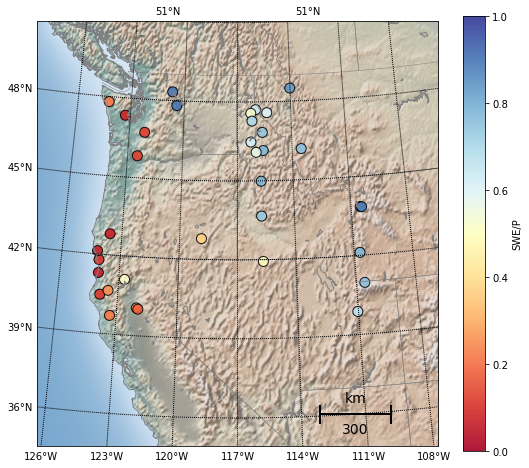

In [27]:
# read the location shapefile
gdf = gp.read_file(idir_shp + "peakSWE_precip.shp")
gdf.crs = {'init': 'epsg:4326'}

# 1. Draw the map background
fig = plt.figure(figsize=(9, 8))

m = Basemap(projection='lcc', resolution='h', 
            lat_0=43.0, lon_0=-117,
            width=1.7E6, height=1.8E6)


draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_Pr"]/gdf["PeakSWE_Pr"])*100,  color= gdf["PeakSWE_Pr"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap 
m.shadedrelief(zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# m.drawrivers(color = "blue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,3.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]

# Scalebar
m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


plt.colorbar(label='SWE/P')
plt.clim(0, 1)

plt.show()

In [8]:
gdf.columns

Index(['LatGauge', 'LonGauge', 'GAGEID', 'FittedSlop', 'FittedInte', 'Slope',
       'Nov1SM', 'MeanWinter', 'TheilSenSl', 'SpringRuno', 'SpringRu_1',
       'AvgWinterT', 'AvgAnnualT', 'PeakSWE', 'WinterPrec', 'SpringPrec',
       'PeakSWE_Pr', 'Apr1SWE', 'MeanOctSM', 'MeanNovSM', 'MeanDOWYPe',
       'NovTemp', 'DecTemp', 'JanTemp', 'FebTemp', 'NovSWE', 'DecSWE',
       'JanSWE', 'JanSM', 'TheilSen_1', 'SlopeSprin', 'VolSMChang',
       'VolSMCha_1', 'SM_DOWYPea', 'VolSMCha_2', 'July31SM', 'SpringRu_2',
       'SpringPr_1', 'WinterPr_1', 'SpringEvap', 'SpringBase', 'OctPrecip',
       'NovPrecip', 'DecPrecip', 'JanPrecip', 'FebPrecip', 'MarPrecip',
       'AprPrecip', 'MayPrecip', 'JunPrecip', 'JulPrecip', 'Dec1SM', 'Jan1SM',
       'Feb1SM', 'Mar1SM', 'Apr1SM', 'CorrNov1SM', 'PValue_Cor', 'CorrNov1_1',
       'PValue_C_1', 'CorrOctSM_', 'PValue_C_2', 'CorrOctSM1', 'PValue_C_3',
       'CorrNovSM_', 'PValue_C_4', 'CorrNovSM1', 'PValue_C_5', 'R2_Nov1SM_',
       'R2_Nov1SM1', 'R2_OctS

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\sarfa\Anaconda3\envs\gwatt\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



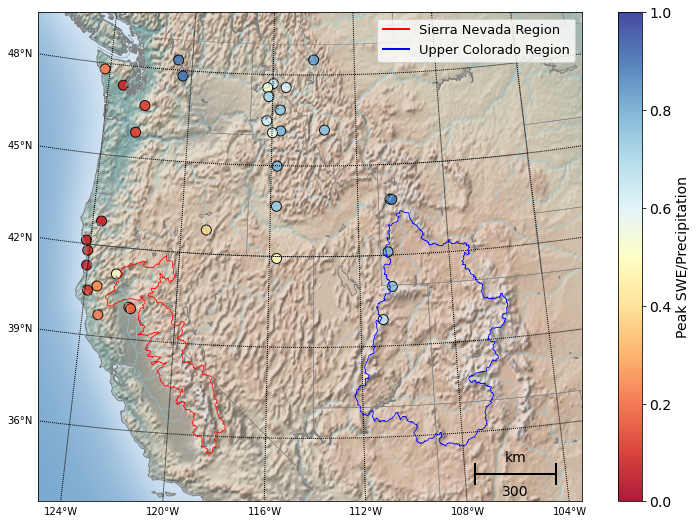

In [29]:
# read the location shapefile
gdf = gp.read_file(idir_shp + "peakSWE_precip.shp")
gdf.crs = {'init': 'epsg:4326'}

# 1. Draw the map background
fig = plt.figure(figsize=(13, 9))

m = Basemap(projection='lcc', resolution='h', #lcc
            lat_0=42.0, lon_0=-114.2,
            width=2.0E6, height=1.8E6)

# Plot points
draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_Pr"]/gdf["PeakSWE_Pr"])*100,  color= gdf["PeakSWE_Pr"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap 
m.shadedrelief(zorder = 0)
# m.bluemarble()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawrivers(color = "skyblue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,4.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]


# Plot region boundary
m.readshapefile((idir_shp + "Sierra_reg_d"),'Sierra Nevada Region', drawbounds=True, linewidth=.7, color='r')
m.readshapefile((idir_shp + "UCol_reg"),'Upper Colorado Region', drawbounds=True, linewidth=.7, color='b')


# Scalebar
m.drawmapscale(-106., 34.5,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)
               ]

plt.legend(custom_lines, ["Sierra Nevada Region", 'Upper Colorado Region'], 
                    loc = "upper right",
                    prop={'size':13})


# Color bar
cbar = plt.colorbar(label='SWE/P')
plt.clim(0, 1)
cbar.set_label(r"Peak SWE/Precipitation", size=14)
# Color bar font size
cbar.ax.tick_params(labelsize=14) 

plt.show()